<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de um Modelo de Regressão para Previsão do Preço de Imóveis da Califórnia. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>  Este projeto tem o intuito de ser um Modelo de Machine Learning para prever o preço de imóveis da Califórnia


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> 
</i> 
</p>  


https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features


# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [2]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, uniform
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.diagnostic import lilliefors

# Bibliotecas de Seleção de Modelos
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection

# Bibliotecas de Pré-Processamento e Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

* Plota Barras 

In [3]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )

            ax.set_ylim(0, builtins.max(sizes)*1.1)
            ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
            # Formatação manual dos rótulos do eixo y para remover a notação científica
            ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
            # Adicionamos os nomes das categorias no eixo x
            ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
                    # Formatação manual dos rótulos do eixo y para remover a notação científica
                    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
                    # Adicionamos os nomes das categorias no eixo x
                    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
                    k = k + 1
                    
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
                    # Formatação manual dos rótulos do eixo y para remover a notação científica
                    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
                    # Adicionamos os nomes das categorias no eixo x
                    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
                    k = k + 1
            
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
                    # Formatação manual dos rótulos do eixo y para remover a notação científica
                    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
                    # Adicionamos os nomes das categorias no eixo x
                    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
                    k = k + 1
           
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
            # Formatação manual dos rótulos do eixo y para remover a notação científica
            ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
            # Adicionamos os nomes das categorias no eixo x
            ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
                    # Formatação manual dos rótulos do eixo y para remover a notação científica
                    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
                    # Adicionamos os nomes das categorias no eixo x
                    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
                    k = k + 1
            

        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
                    # Formatação manual dos rótulos do eixo y para remover a notação científica
                    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
                    # Adicionamos os nomes das categorias no eixo x
                    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
                    k = k + 1
            

        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation=45, ha='right', fontsize=10)
                    # Formatação manual dos rótulos do eixo y para remover a notação científica
                    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
                    # Adicionamos os nomes das categorias no eixo x
                    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)
                    k = k + 1
            


* Plota Histogramas 

In [4]:
def plota_histograma(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:

        if (linhas == 1) and (colunas == 1): 
            k = 0
            mediana = df[lista_variaveis[k]].median()
            media = df[lista_variaveis[k]].mean()
            plt.figure(figsize = (14, 5))
            ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30, hue = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Frequência', fontsize = 14)
            ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
            ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
            plt.ticklabel_format(style='plain')
            plt.legend(loc = 'best')
            plt.ticklabel_format(style='plain', axis='both')
            plt.show()
            
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    mediana = df[lista_variaveis[k]].median()
                    media = df[lista_variaveis[k]].mean().round()
                    ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30, hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Frequência', fontsize = 14)
                    ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                    ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                    ax.ticklabel_format(style='plain')
                    ax.legend(loc = 'best')
                    ax.ticklabel_format(style='plain', axis='both')
                    k = k + 1
            

        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    mediana = df[lista_variaveis[k]].median()
                    media = df[lista_variaveis[k]].mean().round()
                    ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30, hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Frequência', fontsize = 14)
                    ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                    ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                    ax.ticklabel_format(style='plain')
                    ax.legend(loc = 'best')
                    ax.ticklabel_format(style='plain', axis='both')
                    k = k + 1
            
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    mediana = df[lista_variaveis[k]].median()
                    media = df[lista_variaveis[k]].mean().round()
                    ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30, hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Frequência', fontsize = 14)
                    ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                    ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                    ax.ticklabel_format(style='plain')
                    ax.legend(loc = 'best')
                    ax.ticklabel_format(style='plain', axis='both')
                    k = k + 1
            
    else:
    
        if (linhas == 1) and (colunas == 1): 
            k = 0
            mediana = df[lista_variaveis[k]].median()
            media = df[lista_variaveis[k]].mean()
            plt.figure(figsize = (14, 5))
            ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Frequência', fontsize = 14)
            ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
            ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
            plt.ticklabel_format(style='plain')
            plt.legend(loc = 'best')
            plt.ticklabel_format(style='plain', axis='both')
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    mediana = df[lista_variaveis[k]].median()
                    media = df[lista_variaveis[k]].mean().round()
                    ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Frequência', fontsize = 14)
                    ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                    ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                    ax.ticklabel_format(style='plain')
                    ax.legend(loc = 'best')
                    ax.ticklabel_format(style='plain', axis='both')
                    k = k + 1
            
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    mediana = df[lista_variaveis[k]].median()
                    media = df[lista_variaveis[k]].mean().round()
                    ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Frequência', fontsize = 14)
                    ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                    ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                    ax.ticklabel_format(style='plain')
                    ax.legend(loc = 'best')
                    ax.ticklabel_format(style='plain', axis='both')
                    k = k + 1
            

        else:
            fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    mediana = df[lista_variaveis[k]].median()
                    media = df[lista_variaveis[k]].mean().round()
                    ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Frequência', fontsize = 14)
                    ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                    ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                    ax.ticklabel_format(style='plain')
                    ax.legend(loc = 'best')
                    ax.ticklabel_format(style='plain', axis='both')
                    k = k + 1
            


* Plota Boxplot

In [5]:
def plota_boxplot(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:
        if (linhas == 1) and (colunas == 1): 
            k = 0
            plt.figure(figsize = (20, 14))
            ax = sns.boxplot(x = lista_variaveis[k], data = df, palette = ['#1FB3E5', '#64ED8F', '#B864ED'], orient = 'h', y = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
            ax.set_ylabel(f'Frequência', fontsize = 10)
            ax.xaxis.set_major_formatter('{:.0f}'.format)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (20, 14), sharey = True)
            fig.suptitle(f'{titulo}', fontsize = 10)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.boxplot(x = lista_variaveis[k], data = df, palette = ['#1FB3E5', '#64ED8F', '#B864ED'], ax = axis[j], orient = 'h', y = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                    ax.set_ylabel(f'Frequência', fontsize = 10)
                    ax.set_xticklabels(ax.get_xticks(), fontsize=7) 
                    k = k + 1
            
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (20, 14), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.boxplot(x = lista_variaveis[k], data = df, palette = ['#1FB3E5', '#64ED8F', '#B864ED'], ax = axis[i], orient = 'h', y = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                    ax.set_ylabel(f'Frequência', fontsize = 10)
                    ax.set_xticklabels(ax.get_xticks(), fontsize=7) 
                    k = k + 1
            
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize = (20, 14), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.boxplot(x = lista_variaveis[k], data = df, palette = ['#1FB3E5', '#64ED8F', '#B864ED'], ax = axis[i, j], orient = 'h', y = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                    ax.set_ylabel(f'Frequência', fontsize = 10)
                    ax.set_xticklabels(ax.get_xticks(), fontsize=7) 
                    k = k + 1

    else:
        if (linhas == 1) and (colunas == 1): 
            k = 0
            plt.figure(figsize = (20, 14))
            ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', orient = 'h')
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
            ax.set_ylabel(f'Frequência', fontsize = 10)
            ax.xaxis.set_major_formatter('{:.0f}'.format)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (20, 14), sharey = True)
            fig.suptitle(f'{titulo}', fontsize = 10)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], orient = 'h')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                    ax.set_ylabel(f'Frequência', fontsize = 10)
                    ax.set_xticklabels(ax.get_xticks(), fontsize=7) 
                    k = k + 1

        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize = (20, 14), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], orient = 'h')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                    ax.set_ylabel(f'Frequência', fontsize = 10)
                    ax.set_xticklabels(ax.get_xticks(), fontsize=7) 
                    k = k + 1
    
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize = (20, 14), sharey = True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], orient = 'h')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                    ax.set_ylabel(f'Frequência', fontsize = 10)
                    ax.set_xticklabels(ax.get_xticks(), fontsize=7) 
                    k = k + 1
            


* Plota Dispersão

In [6]:
def plota_dispersao(df, titulo,  x, y, metodo):
    plt.figure(figsize = (10, 5))
    sns.set(style = 'whitegrid')
    corr1 = str(df[[x, y]].corr(method = metodo).iloc[1, 0].round(2))
    sns.scatterplot(data = df, x = x, y = y, color = '#1FB3E5', sizes = 1, alpha = 0.50, marker = '.')
    plt.text(1, 1, f'Correlacao: {corr1}', fontsize = 12)
    plt.title(f'{titulo}', fontsize = 14)
    plt.xlabel(f'{x}', fontsize = 14)
    plt.ylabel(f'{y}', fontsize = 14)
    plt.ticklabel_format(style = 'plain')
    plt.grid(True, linestyle=':')
    sns.despine()
    plt.tight_layout()
    plt.show()

* Analisa Correlação

In [7]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize=(14, 7))
    heatmap = sns.heatmap(df.corr(method=metodo), vmin=-1, vmax=1, cmap='magma', annot = True)
    heatmap.set_title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


* Analisa Normalidade 

In [8]:
def analisa_normalidade(amostra, variavel):

    normaltest_amostra = normaltest(amostra[variavel])
    if normaltest_amostra[1] < 0.05:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de que a variável "{variavel}" segue uma Distribuição Normal é REJEITADA!')
    else:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de  que a variável "{variavel}" segue uma Distribuição Normal é ACEITA')

    plt.figure(figsize = (5, 3))
    stats.probplot(amostra[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 1', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.show()

* Teste de Hipótese para Duas Amostras Independentes 

In [9]:
def teste_hipotese_duas_amostras_independentes(parametrico, amostra1, amostra2, variavel):
    media_amostra_1 = amostra1[variavel].mean()
    media_amostra_2 = amostra2[variavel].mean()
    mediana_amostra_1 = amostra1[variavel].median()
    mediana_amostra_2 = amostra2[variavel].median()

    if parametrico == True: 
        print(f'Média Amostra 1: {media_amostra_1}')
        print(f'Média Amostra 2: {media_amostra_2}')
        stat, p_value = ztest(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese Z, não há diferença significativa entre as médias da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese Z, há diferença significativa entre as médias da Amostra 1 e Amostra 2')
    else:
        print(f'Mediana Amostra 1: {mediana_amostra_1}')
        print(f'Mediana Amostra 2: {mediana_amostra_2}')
        stat, p_value = stats.mannwhitneyu(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese de Mann Whitney, não há diferença significativa entre as medianas da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2')

- Teste de Hipótese para Muitas Amostras Independentes 

In [10]:
def teste_hipotese_muitas_amostras_independentes(amostras, variavel):
    medianas = []
    
    for i, amostra in enumerate(amostras):
        mediana_amostra = amostra[variavel].median()
        medianas.append(mediana_amostra)
        print(f'Mediana Amostra {i+1}: {mediana_amostra}')

    stat, p_value = kruskal(*[amostra[variavel] for amostra in amostras])
    
    if p_value > 0.05:
        print(f'Pelo teste de Kruskal-Wallis, não há diferença significativa entre as medianas das amostras')
    else:
        print(f'Pelo teste de Kruskal-Wallis, há diferença significativa entre as medianas das amostras')


- Feature Engineering 

In [90]:
def cria_clusters(df):
    df['Min_Distance'] = df[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']].min(axis=1)
    df['Cluster_Distance'] = np.where(df["Min_Distance"] == df["Distance_to_LA"], 'LA',
                             np.where(df["Min_Distance"] == df["Distance_to_SanDiego"], 'SanDiego',
                             np.where(df["Min_Distance"] == df["Distance_to_SanJose"], 'SanJose',
                             np.where(df["Min_Distance"] == df["Distance_to_SanFrancisco"], 'SanFrancisco', 'Other'))))
    #df.drop(['Min_Distance'], axis=1, inplace=True)
    return df

def cria_features_comodos(df):
    df['Number_of_House_Rooms'] = df['Tot_Rooms'] + df['Tot_Bedrooms']
    df['Concentration_of_People'] = df['Population'] + df['Households']
    df['Ratio_of_Rooms_per_Residence'] = df['Number_of_House_Rooms'] / df['Concentration_of_People']
    #df.drop(['Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Number_of_House_Rooms', 'Concentration_of_People'], axis=1, inplace=True)

    return df

- Métricas 

In [12]:
def metricas_regressao(regressor, target, y_train, y_predict_train, y_test, y_predict_test, coeficiente_det_train, coeficiente_det_test):
    mae_train = mean_absolute_error(y_predict_train, y_train)
    mse_train = mean_squared_error(y_predict_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_predict_train, y_train))
    metricas_treino = pd.DataFrame({'R2':coeficiente_det_train, 'MAE':mae_train, 'RMSE':rmse_train, 'Etapa':'treino', 'Regressor':regressor}, index = np.arange(1, 2))
    
    mae_test = mean_absolute_error(y_predict_test, y_test)
    mse_test = mean_squared_error(y_predict_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_predict_test, y_test))
    metricas_teste = pd.DataFrame({'R2':coeficiente_det_test, 'MAE':mae_test, 'RMSE':rmse_test, 'Etapa':'teste', 'Regressor':regressor}, index = np.arange(1, 2))
    
    metricas_finais = pd.concat([metricas_treino, metricas_teste])

    return metricas_finais

* Validação Cruzada 

In [163]:
def validacao_cruzada_regressao(regressor, df, target_column, n_splits):

    def cria_clusters(df):
        df['Min_Distance'] = df[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']].min(axis=1)
        df['Cluster_Distance'] = np.where(df["Min_Distance"] == df["Distance_to_LA"], 'LA',
                                 np.where(df["Min_Distance"] == df["Distance_to_SanDiego"], 'SanDiego',
                                 np.where(df["Min_Distance"] == df["Distance_to_SanJose"], 'SanJose',
                                 np.where(df["Min_Distance"] == df["Distance_to_SanFrancisco"], 'SanFrancisco', 'Other'))))
        return df

    def cria_features_comodos(df):
        df['Number_of_House_Rooms'] = df['Tot_Rooms'] + df['Tot_Bedrooms']
        df['Concentration_of_People'] = df['Population'] + df['Households']
        df['Ratio_of_Rooms_per_Residence'] = df['Number_of_House_Rooms'] / df['Concentration_of_People']
        return df



    x = df.drop(target_column, axis=1)
    y = df[target_column]

    # Inicializar o KFold para dividir os dados
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Listas para armazenar as métricas em cada fold
    r2_scores = []
    mae_scores = []
    rmse_scores = []

    # Loop pelos folds
    for train_idx, test_idx in kfold.split(x):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        x_train, x_test = cria_clusters(x_train), cria_clusters(x_test)
        x_train, x_test = cria_features_comodos(x_train), cria_features_comodos(x_test)

        categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
        discretas = [column for column in x_train.columns if x_train[column].dtype.name == 'int64']
        continuas = [column for column in x_train.columns if x_train[column].dtype.name == 'float64']

       # Inicializar o modelo de regressão KNeighborsRegressor
        models = {
            'Regressão Linear': make_pipeline(
                ColumnTransformer([
                    ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                    ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                    ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas),
                    ('scaler_discretas', make_pipeline(MinMaxScaler()), discretas),
                    ('scaler_continuas', make_pipeline(MinMaxScaler()), continuas)
                ]),
                LinearRegression()
            ),
            'KNN Regressor': make_pipeline(
                ColumnTransformer([
                    ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                    ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                    ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas),
                    ('scaler_discretas', make_pipeline(MinMaxScaler()), discretas),
                    ('scaler_continuas', make_pipeline(MinMaxScaler()), continuas)
                ]),
                KNeighborsRegressor(n_neighbors=4)
            ),
            'SVR Regressor': make_pipeline(
                ColumnTransformer([
                    ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                    ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                    ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas),
                    ('scaler_discretas', make_pipeline(MinMaxScaler()), discretas),
                    ('scaler_continuas', make_pipeline(MinMaxScaler()), continuas)
                ]),
                SVR(kernel='linear')
            ),
            'Random Forest Regressor': make_pipeline(
                ColumnTransformer([
                    ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                    ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                    ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
                RandomForestRegressor(random_state=42, n_estimators=100, max_depth=8)
            )
        }

        if regressor in models:
            model = models[regressor]
        else:
            print('Utilize Regressão Linear, KNN Regressor, SVR Regressor, Random Forest Regressor como opções de Regressor!')

        # Treinar o modelo usando os dados de treinamento
        model.fit(x_train, y_train)

        # Fazer as previsões usando o modelo nos dados de teste
        y_pred = model.predict(x_test)

        # Calcular as métricas R², MAE e RMSE
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        r2_scores.append(r2)
        mae_scores.append(mae)
        rmse_scores.append(rmse)

    # Calcular a média das métricas para todos os folds
    mean_r2 = np.mean(r2_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)

    metricas_finais = pd.DataFrame({
        'R2': mean_r2,
        'MAE': mean_mae,
        'RMSE': mean_rmse,
        'Etapa': 'validacao_cruzada',
        'Regressor': regressor
    }, index=[1])

    return metricas_finais


- Junção de Matrizes 

In [14]:
def metricas_regressao_modelos_juntos(lista_modelos):
    metricas_modelos = pd.concat(lista_modelos).set_index('Regressor')
    return metricas_modelos

* Separa entre Features e Target 

In [15]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y


- Separa entre Treino e Teste 

In [16]:
def separa_treino_teste(target, dados, size):
    x = dados.drop(target, axis = 1)
    y = dados[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= size, random_state = 42)

    df_train = pd.concat([y_train, x_train], axis = 1)
    df_test = pd.concat([y_test, x_test], axis = 1)

    return df_train, df_test

- Discretização

In [17]:
def discretiza_variavel(df, variavel_quant, variavel_qualit, bins, labels, right):
    df[variavel_qualit] = pd.cut(
        df[variavel_quant], 
        bins= bins, 
        labels= labels, 
        right = right
    )
    df.drop(variavel_quant, axis = 1, inplace = True)

- PCA 

In [18]:
def pca(df, variaveis):
    # Criar um novo DataFrame apenas com as variáveis selecionadas
    selected_df = df[variaveis].copy()

    # Definir o pipeline com o PCA
    pipeline = make_pipeline(
        MinMaxScaler(),  # Usar MinMaxScaler para escalar todas as variáveis selecionadas
        PCA(n_components=1)  # Definir o número de componentes principais desejados
    )

    # Ajustar o pipeline aos dados
    pipeline.fit(selected_df)
    pca_result = pipeline.transform(selected_df)

    # Realizar a transformação inversa do MinMaxScaler nas componentes principais
    pca_result_original_scale = pipeline.named_steps['pca'].inverse_transform(pca_result)

    variance_ratio = (pipeline.named_steps['pca'].explained_variance_ratio_)*100

    return pipeline, pca_result_original_scale, variance_ratio.round(2)


- Regressor 

In [39]:
def Regressor(regressor, x_train, y_train, x_test, y_test):

    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    discretas = [column for column in x_train.columns if x_train[column].dtype.name == 'int64']
    continuas = [column for column in x_train.columns if x_train[column].dtype.name == 'float64']

    models = {
        'Regressão Linear': make_pipeline(
            ColumnTransformer([
                ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas),
                ('scaler_discretas', make_pipeline(MinMaxScaler()), discretas),
                ('scaler_continuas', make_pipeline(MinMaxScaler()), continuas)
            ]),
            LinearRegression()
        ),
        'KNN Regressor': make_pipeline(
            ColumnTransformer([
                ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas),
                ('scaler_discretas', make_pipeline(MinMaxScaler()), discretas),
                ('scaler_continuas', make_pipeline(MinMaxScaler()), continuas)
            ]),
            KNeighborsRegressor(n_neighbors=10)
        ),
        'SVR Regressor': make_pipeline(
            ColumnTransformer([
                ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas),
                ('scaler_discretas', make_pipeline(MinMaxScaler()), discretas),
                ('scaler_continuas', make_pipeline(MinMaxScaler()), continuas)
            ]),
            SVR(kernel='linear')
        ),
        'Random Forest Regressor': make_pipeline(
            ColumnTransformer([
                ('encoder', make_pipeline(BinaryEncoder()), categoricas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            RandomForestRegressor(random_state=42, n_estimators=100, max_depth=8)
        )
    }

    if regressor in models:
        model = models[regressor]
    else:
        print('Utilize Regressão Linear, KNN Regressor, SVR Regressor, Random Forest Regressor como opções de Regressor!')

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    coeficiente_det_train = r2_score(y_train, y_pred_train)
    coeficiente_det_test = r2_score(y_test, y_pred_test)

    return model, y_pred_train, y_pred_test, coeficiente_det_train, coeficiente_det_test


- Cálculo da Inércia 

In [20]:
def elbow_method(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features].values.reshape(-1, 1))
    wcss = []
    
    for n_clusters in np.arange(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(padronizado)
        wcss.append(kmeans.inertia_)
    
    plt.plot(np.arange(1, 11), wcss, marker='o', color = '#1FB3E5')
    plt.xlabel('Número de clusters')
    plt.ylabel('Soma dos quadrados intra-cluster (WCSS)')
    plt.title('Método Elbow')
    plt.show()

* Algoritmo de Clusterização

In [21]:
def kmeans(df, variaveis, n_clusters):
    # Criar um novo DataFrame apenas com as variáveis selecionadas
    selected_df = df[variaveis].copy()

    # Definir o pipeline com o Standard Scaler e K-Means
    pipeline = make_pipeline(
        ColumnTransformer([
            ('scaler', StandardScaler(), variaveis)  # Usar StandardScaler para escalar as variáveis selecionadas
        ]),
        KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=300)
    )

    # Ajustar o pipeline aos dados
    pipeline.fit(selected_df)  # Aqui podemos usar diretamente o DataFrame "selected_df"
    kmeans_labels = pipeline.predict(selected_df)
    
    return pipeline, kmeans_labels



- Ordenador de Clusters 

In [22]:
def ordenador_de_cluster(metodo_cluster, variavel, ordem, dados):
    media_cluster = dados.groupby(metodo_cluster, as_index = False)[variavel].mean()
    score_cluster = media_cluster.sort_values(by = variavel, ascending = ordem)
    scores_ordenados = sorted(list(score_cluster[metodo_cluster].unique()))
    cluster_ordenados = score_cluster.copy()
    cluster_ordenados.drop(metodo_cluster, axis = 1, inplace = True)
    cluster_ordenados[metodo_cluster] = scores_ordenados
    cluster_ordenados = cluster_ordenados[[metodo_cluster, variavel]]
    
    
    return cluster_ordenados


# <font color='red' style='font-size: 40px;'> 1) Entendimento da Base de Dados </font>
<hr style='border: 2px solid red;'>

### 1.1) Descrição das Variáveis

- The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

> 1. 'Median House Value' : Valor mediano da casa para famílias dentro de um quarteirão de casas (medido em dólares americanos) [$]

> 2. 'Median Income':Renda mediana para famílias dentro de um quarteirão de casas (medida em dezenas de milhares de dólares americanos) [10k$]

> 3. 'Median Age': Idade mediana de uma casa dentro de um quarteirão; um número menor é um prédio mais novo [anos]

> 4. 'Tot Rooms': Número total de quartos dentro de um quarteirão
 
> 5. 'Tot Bedrooms': Número total de quartos dentro de um quarteirão
 
> 6. 'Population': Número total de pessoas que residem em um quarteirão
 
> 7. 'Households': Número total de domicílios (um grupo de pessoas que residem em uma unidade domiciliar) por quarteirão

> 8. 'Distance to coast': Distância ao ponto de costa mais próximo [m]
 
> 9. 'Distance to Los Angeles': Distância ao centro de Los Angeles [m]
 
> 10. 'Distance to San Diego': Distância ao centro de San Diego [m]
 
> 11. 'Distance to San Jose': Distância ao centro de São José [m]
 
> 12. 'Distance to San Francisc': Distância ao centro de São Francisco [m]

### 1.2) Informações Inicais

In [23]:
df = pd.read_csv('../04_modelo_previsao_preco_imoveis/data/California_Houses.csv')
print(df.shape)
print(df.dtypes)
display(df.head())

(20640, 12)
Median_House_Value          float64
Median_Income               float64
Median_Age                    int64
Tot_Rooms                     int64
Tot_Bedrooms                  int64
Population                    int64
Households                    int64
Distance_to_coast           float64
Distance_to_LA              float64
Distance_to_SanDiego        float64
Distance_to_SanJose         float64
Distance_to_SanFrancisco    float64
dtype: object


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.00,8.33,41,880,129,322,126,9263.04,556529.16,735501.81,67432.52,21250.21
1,358500.00,8.30,21,7099,1106,2401,1138,10225.73,554279.85,733236.88,65049.91,20880.60
2,352100.00,7.26,52,1467,190,496,177,8259.09,554610.72,733525.68,64867.29,18811.49
3,341300.00,5.64,52,1274,235,558,219,7768.09,555194.27,734095.29,65287.14,18031.05
4,342200.00,3.85,52,1627,280,565,259,7768.09,555194.27,734095.29,65287.14,18031.05


# <font color='red' style='font-size: 40px;'> 2.0 Análise Exploratória </font>
<hr style='border: 2px solid red;'>

### 2.1) Separando em Treino e Teste

> 1. Antes de qualquer análise ou tratamento, deve-se separar em Treino e Teste

> 2. Isso é importante para simular dados em produção e evitar o Data Leakage



In [24]:
df_train = separa_treino_teste('Median_House_Value', df, 0.25)[0]
df_test = separa_treino_teste('Median_House_Value', df, 0.25)[1]

print(f'Dados de Treino: {df_train.shape}')
print(f'Dados de Teste: {df_test.shape}')

Dados de Treino: (15480, 12)
Dados de Teste: (5160, 12)


### 2.2) Avaliando Dados Nulos

> 1. Não há dados faltantes

In [25]:
display(df_train.isnull().sum())
display(df_test.isnull().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

### 2.3) Análise de Correlação 

> 1. Escolheu-se a Correlação de Spearman pois ela mostra relações lineares e não-lineares entre a Target e as Features

> 2. Através dela, nota-se que o valor da casa aparenta ser maior quando a renda da família é mais alta

> 3. Nota-se também que a casa aparenta perder valor conforme fica mais longe da costa/praia.

> 4. Percebe-se também que o número de quartos e cômodos é maior para casas mais populosas, entretanto, isso não aparenta influenciar muito no preço das casas

> 5. Finalmente, viu-se que as distâncias entre LA e San Diego e San Jose e San Francisco são inversamente proporcionais, portanto, moradias perto de LA e San Diego são longe de San Jose e San Francisco

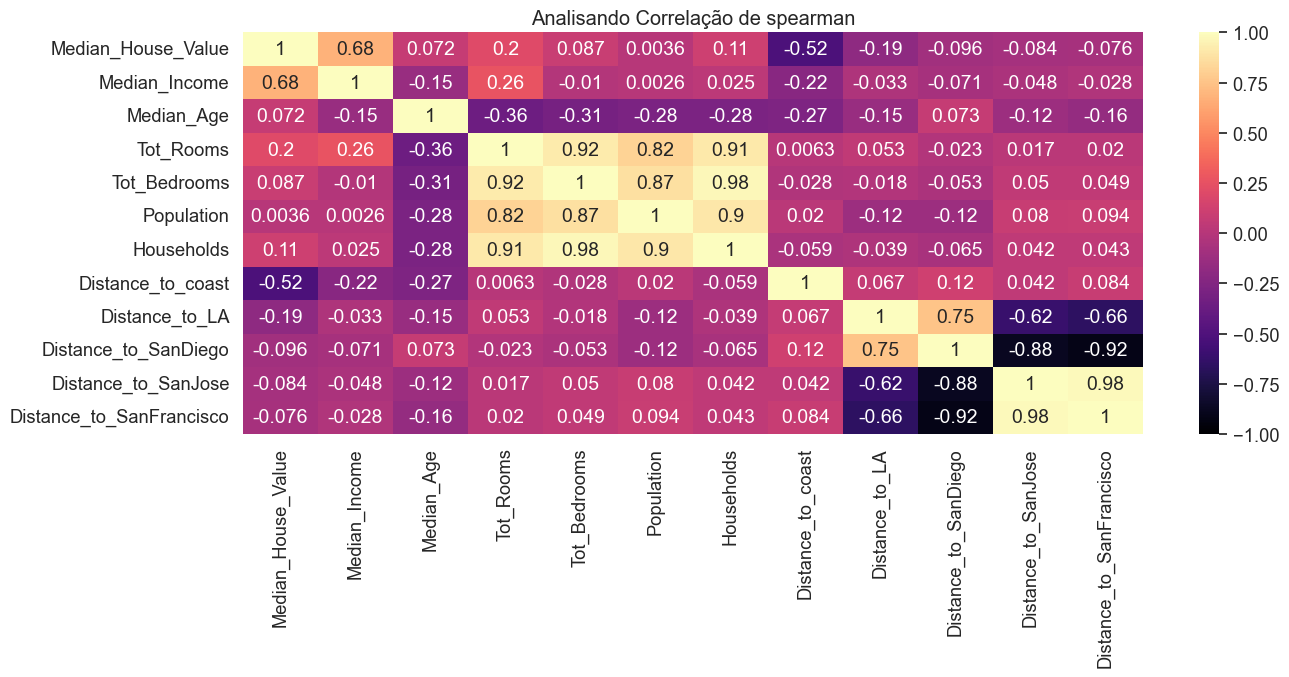

In [26]:
analisa_correlacao('spearman', df_train)

### 2.4) Análise das Distribuições de Features Discretas e Contínuas

> 1. A Target aparenta ter uma distribuição assimétrica para a esquerda, contudo, possui alguns Outliers

> 2. Há Outliers também na renda familiar e distância até a costa, indicando que há famílias com rendas altas e famílias que moram realmente muito longe da costa

> 3. Em relação as variáveis sobre as residências, de fato há muitos Outliers, indicando que há residências com alta concentração de moradores

> 4. Também pode significar ruído, logo, devemos nos atentar a esses pontos pois podem prejudicar o processo de modelagem 

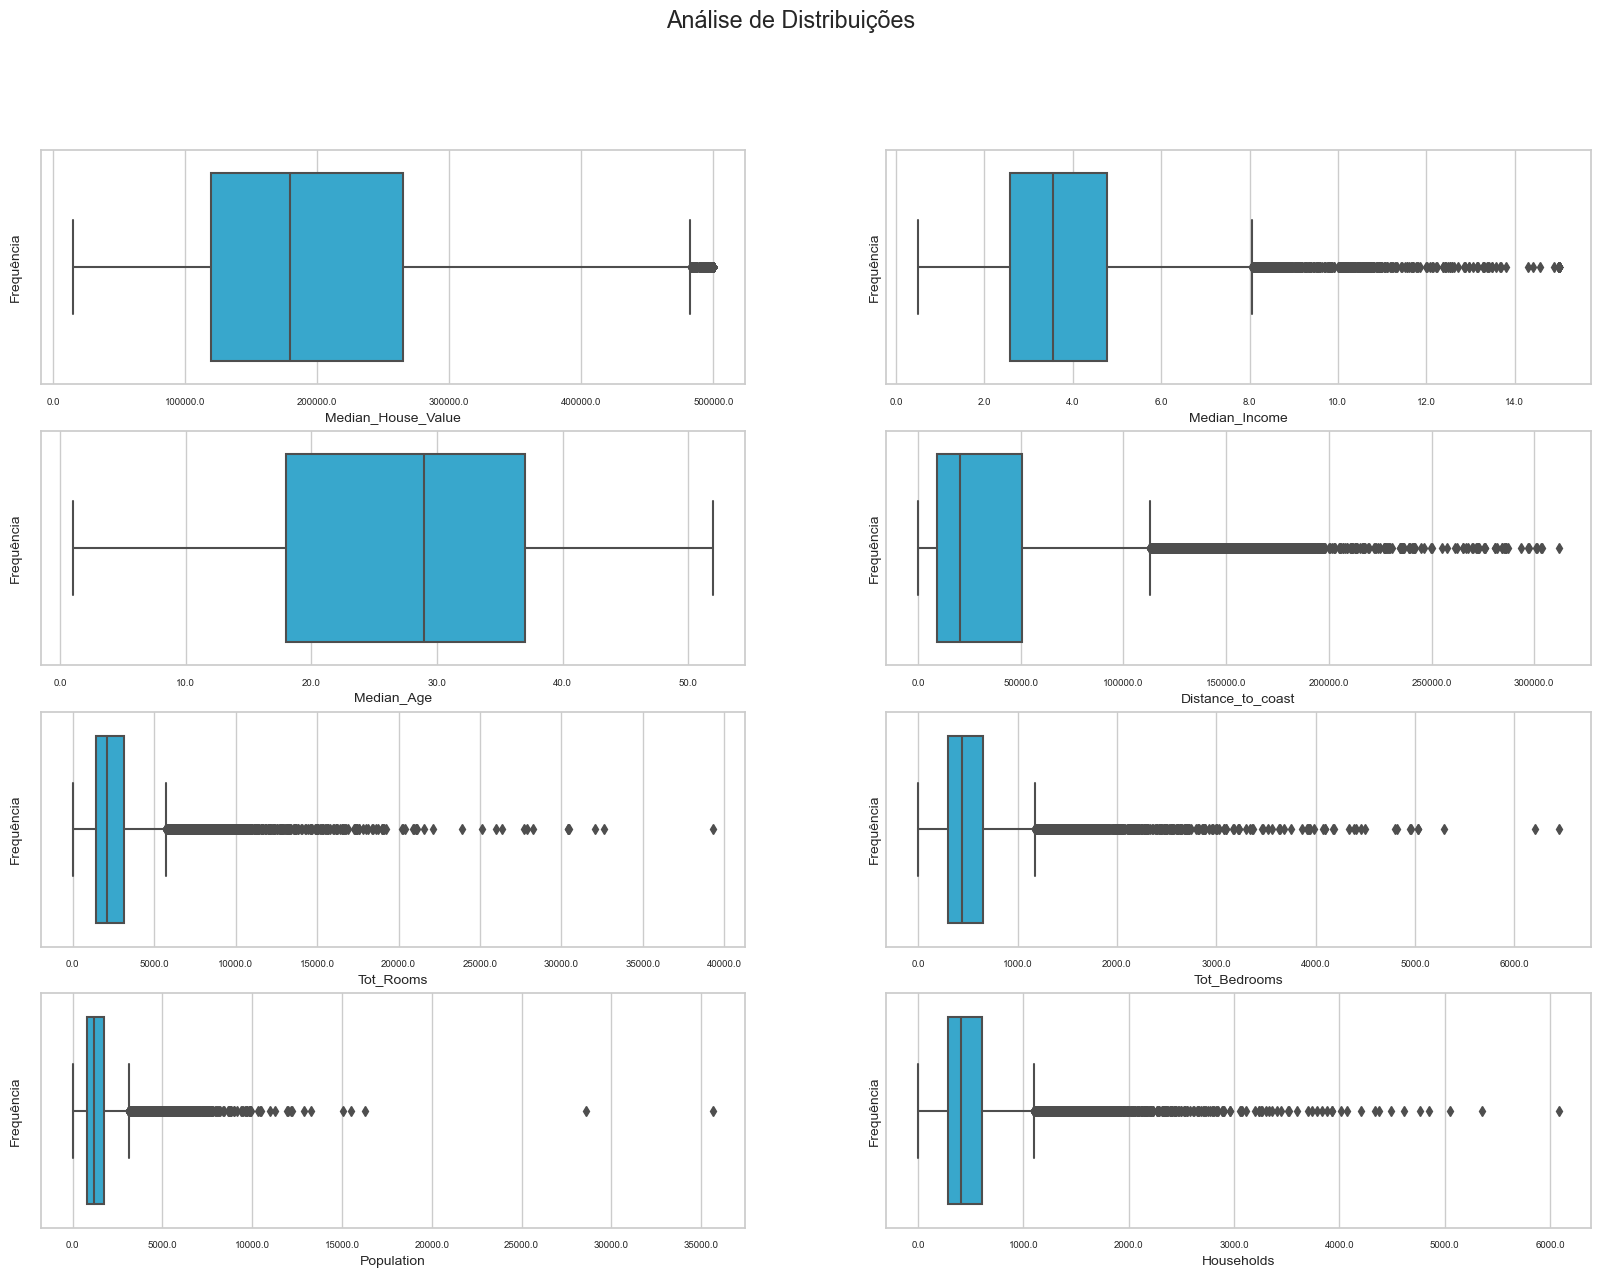

In [27]:
plota_boxplot(['Median_House_Value', 'Median_Income','Median_Age', 'Distance_to_coast', 'Tot_Rooms','Tot_Bedrooms','Population','Households'], False, df_train, 4, 2, 'Análise de Distribuições')

### 2.5) Análise da Distribuição das Variáveis Qualitativas 

> 1. Notou-se que há mais cidades perto de LA e San Diego, ao passo que há mais cidades longe de San Jose e San Francisco

> 2. A análise de correlação mostrou que as distâncias de LA e San Diego são inversamente proporcionais a San Jose e San Francisco

> 3. Dada a situação, Optou-se por aplicar um método para discretizar essas variáveis de distância a fim de criar uma nova feature binária chamada "Min_Distance", a qual estratifica a amostra e retorna a cidade de menor distância da residência 

> 4. Percebe-se pelo gráfico que a maioria das cidades estão próximas a LA, depois San Francisco, depois San Jose e finalmente San Diego

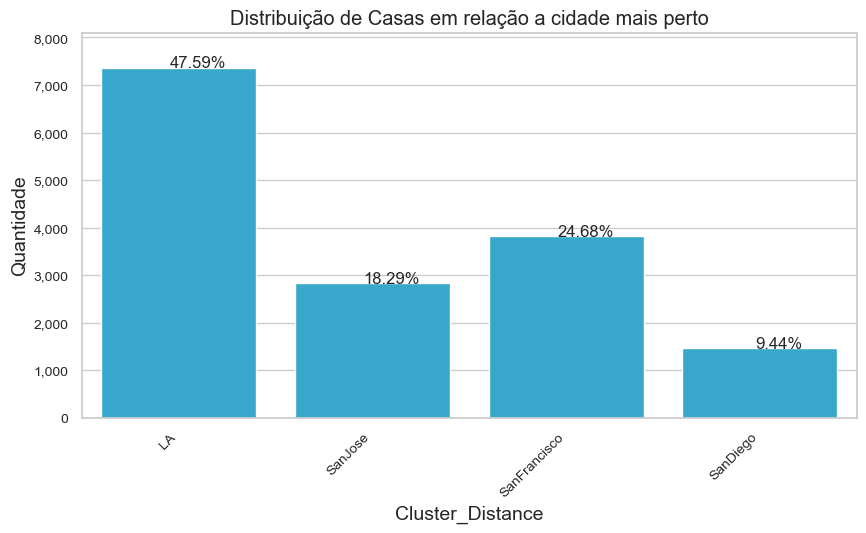

In [28]:
df_train = cria_clusters(df_train)
plota_barras(['Cluster_Distance'], False, df_train, 1, 1, 'Distribuição de Casas em relação a cidade mais perto')


### 2.6) Há diferença significativa de preço entre Clusters?

> 1. Para avaliar essa hipótese, deve-se primeiro entender se as amostras seguem uma distribuição Normal. Pelo gráfico QQPlot, nota-se que nenhuma delas é normalmente distribuída

> 2. Dado que nenhuma amostra segue uma distribuição Normal, decidiu-se aplicar um teste de hipótese multivariado não-paramétrico

> 3. O teste de Kruskal-Wallis é uma análise de variância não paramétrica que compara as medianas de três ou mais grupos independentes, em vez das médias. Ele não assume uma distribuição específica para os dados e é adequado para amostras independentes não normalmente distribuídas.

> 4. Pelos valores, há diferença significativa entre as amostras, portanto, é interessente treinar modelos de forma estratificada

Pelo Teste de Hipótese, A Hipótese Nula de que a variável "Median_House_Value" segue uma Distribuição Normal é REJEITADA!


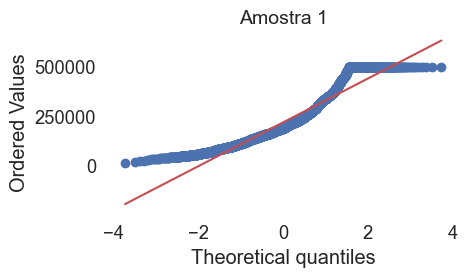

Pelo Teste de Hipótese, A Hipótese Nula de que a variável "Median_House_Value" segue uma Distribuição Normal é REJEITADA!


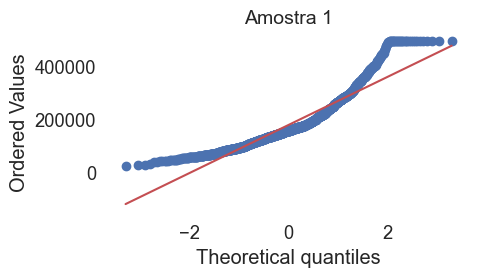

Pelo Teste de Hipótese, A Hipótese Nula de que a variável "Median_House_Value" segue uma Distribuição Normal é REJEITADA!


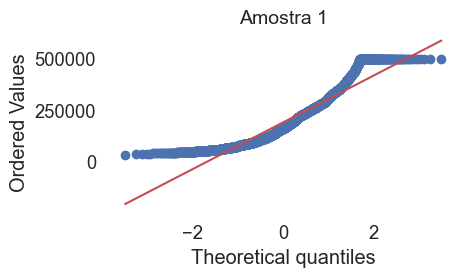

Pelo Teste de Hipótese, A Hipótese Nula de que a variável "Median_House_Value" segue uma Distribuição Normal é REJEITADA!


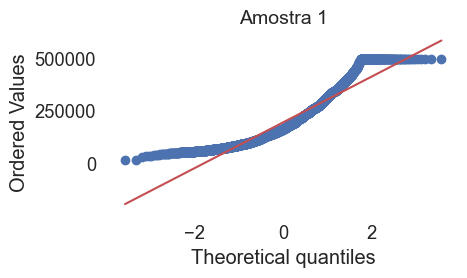

Mediana Amostra 1: 193000.0
Mediana Amostra 2: 159100.0
Mediana Amostra 3: 163650.0
Mediana Amostra 4: 165000.0
Pelo teste de Kruskal-Wallis, há diferença significativa entre as medianas das amostras


In [29]:
LA = df_train.loc[df_train['Cluster_Distance'] == 'LA'][['Median_House_Value']]
SanDiego = df_train.loc[df_train['Cluster_Distance'] == 'SanDiego'][['Median_House_Value']]
SanJose = df_train.loc[df_train['Cluster_Distance'] == 'SanJose'][['Median_House_Value']]
SanFrancisco = df_train.loc[df_train['Cluster_Distance'] == 'SanFrancisco'][['Median_House_Value']]

analisa_normalidade(LA, 'Median_House_Value')
analisa_normalidade(SanDiego, 'Median_House_Value')
analisa_normalidade(SanJose, 'Median_House_Value')
analisa_normalidade(SanFrancisco, 'Median_House_Value')

teste_hipotese_muitas_amostras_independentes([LA, SanDiego, SanJose, SanFrancisco], 'Median_House_Value')


# <font color='red' style='font-size: 40px;'> 3.0 Feature Engineer </font>
<hr style='border: 2px solid red;'>

In [91]:
df_train = separa_treino_teste('Median_House_Value', df, 0.20)[0]
df_test = separa_treino_teste('Median_House_Value', df, 0.20)[1]

print(f'Dados de Treino: {df_train.shape}')
print(f'Dados de Teste: {df_test.shape}')

Dados de Treino: (16512, 12)
Dados de Teste: (4128, 12)


### 3.1) Criação dos Clusters

> 1. Como vimos que há diferença significativa entre os valores para cada Cluster, deve-se criar permanentemente a feature de Cluster 

In [92]:
df_train = cria_clusters(df_train)
df_test = cria_clusters(df_test)
display(df_train.head())
display(df_test.head())

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Min_Distance,Cluster_Distance
14196,103000.00,3.26,33,3126,627,2300,623,12116.21,187011.81,12280.84,678476.21,746477.06,12280.84,SanDiego
8267,382100.00,3.81,49,3382,787,1314,756,2155.28,32319.24,149572.31,520697.46,588673.82,32319.24,LA
17445,172600.00,4.16,4,1897,331,915,336,13455.15,216117.67,375504.55,323507.59,387965.07,216117.67,LA
14265,93400.00,1.94,36,1421,367,1418,355,5214.69,184461.17,5571.28,675484.36,743459.72,5571.28,SanDiego
2271,96500.00,3.55,43,2382,431,874,380,176663.23,334484.23,512157.66,195724.41,257705.08,195724.41,SanJose


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Min_Distance,Cluster_Distance
20046,47700.00,1.68,25,1505,367,1392,359,181940.14,233893.53,408714.57,293550.33,358894.99,233893.53,LA
3024,45800.00,2.53,30,2943,697,1565,584,81381.24,164389.28,342981.62,327407.28,395422.05,164389.28,LA
15663,500001.00,3.48,52,3830,1142,1310,963,540.92,562389.57,740893.79,70653.80,2993.53,2993.53,SanFrancisco
20484,218600.00,5.74,17,3051,505,1705,495,29434.72,50615.00,226155.68,444127.56,512081.03,50615.00,LA
9814,278000.00,3.73,34,2351,440,1063,428,5392.75,439632.45,615200.34,79625.50,135780.25,79625.50,SanJose


### 3.2) Combinação das Features de Cômodos e População

> 1. As quatro variáveis são altamente correlacionadas e possuem similaridades

> 2. Dada a situação, optou-se por combiná-las a fim de reduzir a dimensionalidade e manter o poder de discriminação

In [93]:
df_train = cria_features_comodos(df_train)
df_test = cria_features_comodos(df_test)
display(df_train.head())
display(df_test.head())

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Min_Distance,Cluster_Distance,Number_of_House_Rooms,Concentration_of_People,Ratio_of_Rooms_per_Residence
14196,103000.00,3.26,33,3126,627,2300,623,12116.21,187011.81,12280.84,678476.21,746477.06,12280.84,SanDiego,3753,2923,1.28
8267,382100.00,3.81,49,3382,787,1314,756,2155.28,32319.24,149572.31,520697.46,588673.82,32319.24,LA,4169,2070,2.01
17445,172600.00,4.16,4,1897,331,915,336,13455.15,216117.67,375504.55,323507.59,387965.07,216117.67,LA,2228,1251,1.78
14265,93400.00,1.94,36,1421,367,1418,355,5214.69,184461.17,5571.28,675484.36,743459.72,5571.28,SanDiego,1788,1773,1.01
2271,96500.00,3.55,43,2382,431,874,380,176663.23,334484.23,512157.66,195724.41,257705.08,195724.41,SanJose,2813,1254,2.24


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Min_Distance,Cluster_Distance,Number_of_House_Rooms,Concentration_of_People,Ratio_of_Rooms_per_Residence
20046,47700.00,1.68,25,1505,367,1392,359,181940.14,233893.53,408714.57,293550.33,358894.99,233893.53,LA,1872,1751,1.07
3024,45800.00,2.53,30,2943,697,1565,584,81381.24,164389.28,342981.62,327407.28,395422.05,164389.28,LA,3640,2149,1.69
15663,500001.00,3.48,52,3830,1142,1310,963,540.92,562389.57,740893.79,70653.80,2993.53,2993.53,SanFrancisco,4972,2273,2.19
20484,218600.00,5.74,17,3051,505,1705,495,29434.72,50615.00,226155.68,444127.56,512081.03,50615.00,LA,3556,2200,1.62
9814,278000.00,3.73,34,2351,440,1063,428,5392.75,439632.45,615200.34,79625.50,135780.25,79625.50,SanJose,2791,1491,1.87


# <font color='red' style='font-size: 40px;'> 4.0 Aplicação de Modelos de Machine Learning </font>
<hr style='border: 2px solid red;'>

### 4.1) Separação entre Feature e Target 

> 1. Separou-se as Features da Target para cada Amostra

In [94]:
x_train = separa_feature_target('Median_House_Value', df_train)[0]
y_train = separa_feature_target('Median_House_Value', df_train)[1]
x_test = separa_feature_target('Median_House_Value', df_test)[0]
y_test = separa_feature_target('Median_House_Value', df_test)[1]

### 4.3) Métricas de Baseline

> 1. Pelas Métricas, o modelo com melhor desempenho foi a Random Forest

> 2. Ela conseguiu um bom R², MAE e RMSE, provando que entendeu bem o comportamento dos dados de treinamento e consegue generalizar o modelo para dados de teste

> 3. Dado que há casas dos mais variados valores e não criou-se modelos estratificados para cada faixa, concluiu-se que o modelo tem uma boa performance

In [164]:
y_predict_train = Regressor('Regressão Linear', x_train , y_train , x_test , y_test)[1]
y_predict_test = Regressor('Regressão Linear', x_train , y_train , x_test , y_test)[2]
coef_det_train = Regressor('Regressão Linear', x_train , y_train , x_test , y_test)[3]
coef_det_test = Regressor('Regressão Linear', x_train , y_train , x_test , y_test)[4]
metricas_regressao_linear = metricas_regressao('Regressão Linear', 'Median_House_Value', y_train, y_predict_train, y_test, y_predict_test, coef_det_train, coef_det_test)
metricas_regressao_linear_validacao_cruzada = validacao_cruzada_regressao('Regressão Linear', df, 'Median_House_Value', 5)

y_predict_train = Regressor('KNN Regressor', x_train , y_train , x_test , y_test)[1]
y_predict_test = Regressor('KNN Regressor', x_train , y_train , x_test , y_test)[2]
coef_det_train = Regressor('KNN Regressor', x_train , y_train , x_test , y_test)[3]
coef_det_test = Regressor('KNN Regressor', x_train , y_train , x_test , y_test)[4]
metricas_knn = metricas_regressao('KNN Regressor', 'Median_House_Value', y_train, y_predict_train, y_test, y_predict_test, coef_det_train, coef_det_test)
metricas_knn_validacao_cruzada = validacao_cruzada_regressao('KNN Regressor', df, 'Median_House_Value', 5)

y_predict_train = Regressor('Random Forest Regressor', x_train , y_train , x_test , y_test)[1]
y_predict_test = Regressor('Random Forest Regressor', x_train , y_train , x_test , y_test)[2]
coef_det_train = Regressor('Random Forest Regressor', x_train , y_train , x_test , y_test)[3]
coef_det_test = Regressor('Random Forest Regressor', x_train , y_train , x_test , y_test)[4]
metricas_random_forest = metricas_regressao('Random Forest Regressor', 'Median_House_Value', y_train, y_predict_train, y_test, y_predict_test, coef_det_train, coef_det_test)
metricas_random_forest_validacao_cruzada = validacao_cruzada_regressao('Random Forest Regressor', df, 'Median_House_Value', 5)


metricas_finais = metricas_regressao_modelos_juntos(
    [
    metricas_regressao_linear, metricas_regressao_linear_validacao_cruzada,
    metricas_knn, metricas_knn_validacao_cruzada,
    metricas_random_forest, metricas_random_forest_validacao_cruzada
    ]
    )
display(metricas_finais)

,R2,MAE,RMSE,Etapa
Regressor,,,,
Regressão Linear,0.65,50013.97,68413.16,treino
Regressão Linear,0.62,50997.85,70112.92,teste
Regressão Linear,0.64,50248.17,68843.18,validacao_cruzada
KNN Regressor,0.80,33533.46,51725.17,treino
KNN Regressor,0.76,37015.39,56244.49,teste
KNN Regressor,0.76,35918.05,56569.51,validacao_cruzada
Random Forest Regressor,0.82,33674.18,48600.93,treino
Random Forest Regressor,0.76,37282.15,55535.24,teste
Random Forest Regressor,0.78,36774.36,53916.25,validacao_cruzada


# <font color='red' style='font-size: 40px;'> 5.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>

#### 5.1) O Modelo ficou realmente muito bom, pois conseguiu boas métricas no treino, teste e validação cruzada

#### 5.2) Isso indica que o modelo não sofre de Underfitting nem Overfitting, ou seja, 

#### 5.3) Dado que nosso problema envolve preços expressivos, mesmo com "altos valores" o MAE e RMSE ainda conseguem serem ótimos

#### 5.4) Se uma nova casa fosse construída e não tivéssemos ideia de seu valor, esse modelo com certeza chegaria próximo ao valor ideal, portanto, embora tenha erros, ele seria um modelo extremamente útil para problemáticas de precificação de imóveis